IDX PARTNERS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [52]:
df = pd.read_csv('/content/loan_data_2007_2014.csv')
df.head()

<ipython-input-52-2b9e962cf72f>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22617 entries, 0 to 22616
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   22617 non-null  int64  
 1   id                           22617 non-null  int64  
 2   member_id                    22617 non-null  int64  
 3   loan_amnt                    22617 non-null  int64  
 4   funded_amnt                  22617 non-null  int64  
 5   funded_amnt_inv              22617 non-null  float64
 6   term                         22617 non-null  object 
 7   int_rate                     22617 non-null  float64
 8   installment                  22617 non-null  float64
 9   grade                        22617 non-null  object 
 10  sub_grade                    22617 non-null  object 
 11  emp_title                    21120 non-null  object 
 12  emp_length                   21825 non-null  object 
 13  home_ownership  

np.int64(0)

In [5]:
# Mengecek Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0]
print("Missing Values:")
print(missing_data)

Missing Values:
                             Missing Values  Percentage
emp_title                              1497    6.618915
emp_length                              792    3.501791
desc                                   9329   41.247734
purpose                                   1    0.004421
title                                     1    0.004421
zip_code                                  1    0.004421
addr_state                                1    0.004421
dti                                       1    0.004421
delinq_2yrs                               1    0.004421
earliest_cr_line                          1    0.004421
inq_last_6mths                            1    0.004421
mths_since_last_delinq                14964   66.162621
mths_since_last_record                21430   94.751735
open_acc                                  1    0.004421
pub_rec                                   1    0.004421
revol_bal                                 1    0.004421
revol_util                      

In [6]:
missing_values = df.isnull().sum()
missing_values

,0
Unnamed: 0,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
...,...
all_util,22617
total_rev_hi_lim,22617
inq_fi,22617
total_cu_tl,22617


In [7]:
# Mengecek Inconsistent Entries
print("\nUnique values in categorical columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()[:10]}")  # Menampilkan 10 nilai unik pertama


Unique values in categorical columns:
term: [' 36 months' ' 60 months']
grade: ['B' 'C' 'A' 'E' 'F' 'D' 'G']
sub_grade: ['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1']
emp_title: [nan 'Ryder' 'AIR RESOURCES BOARD' 'University Medical Group'
 'Veolia Transportaton' 'Southern Star Photography' 'MKC Accounting '
 'Starbucks' 'Southwest Rural metro' 'UCLA']
emp_length: ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years']
home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
verification_status: ['Verified' 'Source Verified' 'Not Verified']
issue_d: ['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11']
loan_status: ['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)']
pymnt_plan: ['n']
url: ['https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501'
 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430'
 'https://www.

ValueError: List of boxplot statistics and `positions` values must have same the length

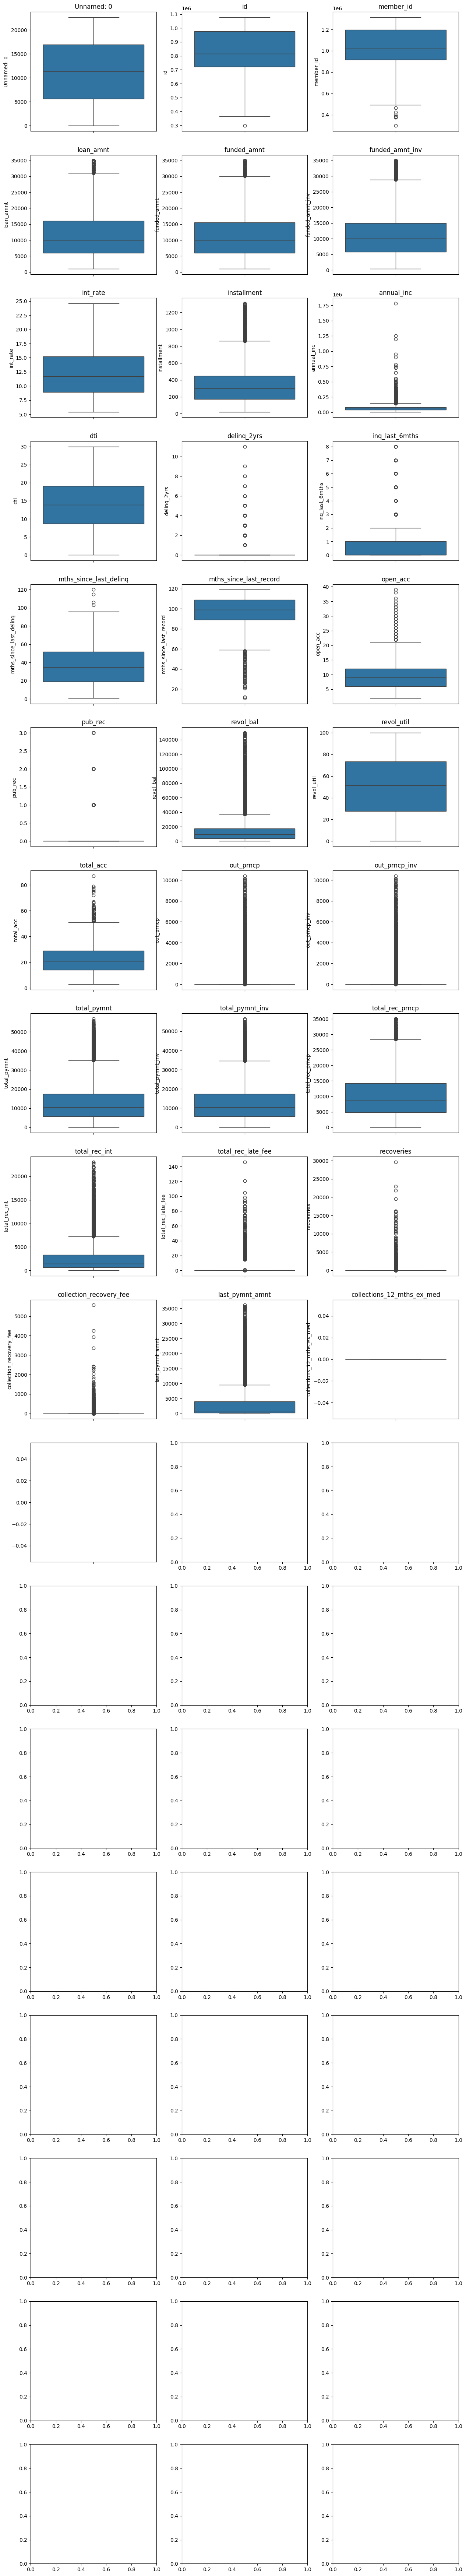

In [8]:
# Outlier
numeric_cols = df.select_dtypes(include=[np.number]).columns
num_cols = len(numeric_cols)
fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, 5 * ((num_cols // 3) + 1)))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Hapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#  Mendeteksi Outlier Menggunakan IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

outlier_counts = {}
for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_counts[col] = len(outliers)

print("\nJumlah outliers per kolom (IQR Method):")
print(outlier_counts)

In [10]:
numeric_columns = [
    "loan_amnt",
    "funded_amnt",
    "int_rate",
    "installment",
    "annual_inc",
    "dti",
    "open_acc",
    "revol_bal",
    "total_acc",
    "pub_rec",
    "recoveries",
    "total_pymnt",
]


<Figure size 1200x800 with 0 Axes>

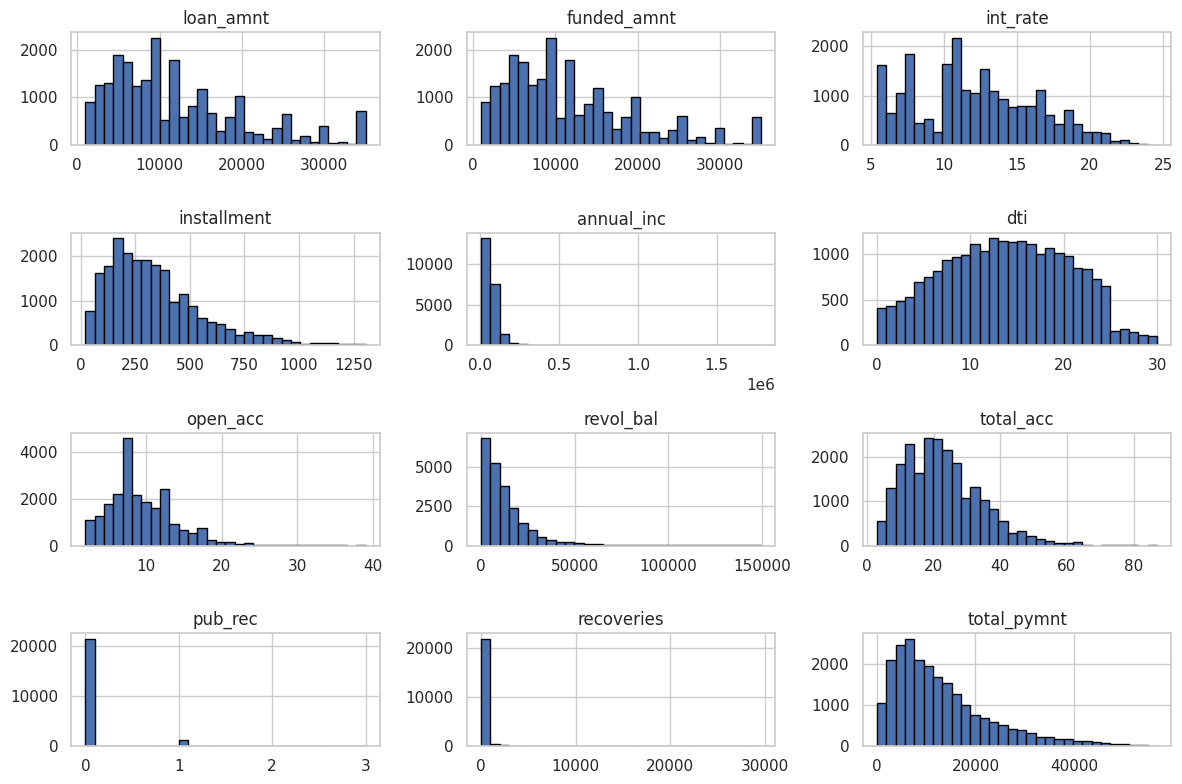

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style seaborn
sns.set(style="whitegrid")

# Pilih kolom numerik yang ada di dataset
numeric_columns = [
    "loan_amnt", "funded_amnt", "int_rate", "installment", "annual_inc",
    "dti", "open_acc", "revol_bal", "total_acc", "pub_rec", "recoveries", "total_pymnt"
]

# ---  UNIVARIATE ANALYSIS ---
##  Histogram untuk melihat distribusi data
plt.figure(figsize=(12, 8))
df[numeric_columns].hist(bins=30, figsize=(12, 8), layout=(4, 3), edgecolor="black")
plt.tight_layout()
plt.show()

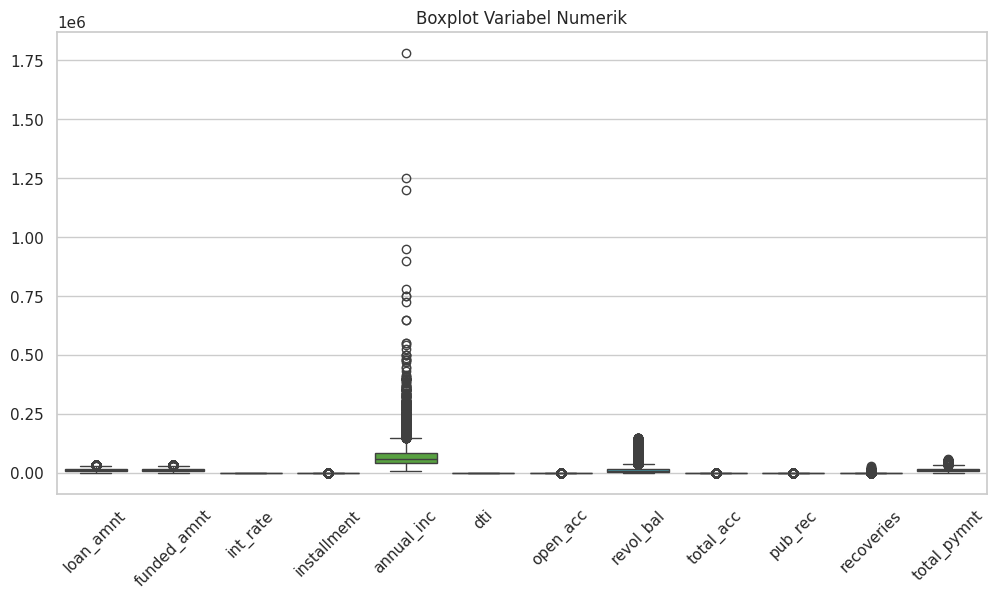

In [12]:
##  Boxplot untuk melihat outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.title("Boxplot Variabel Numerik")
plt.show()

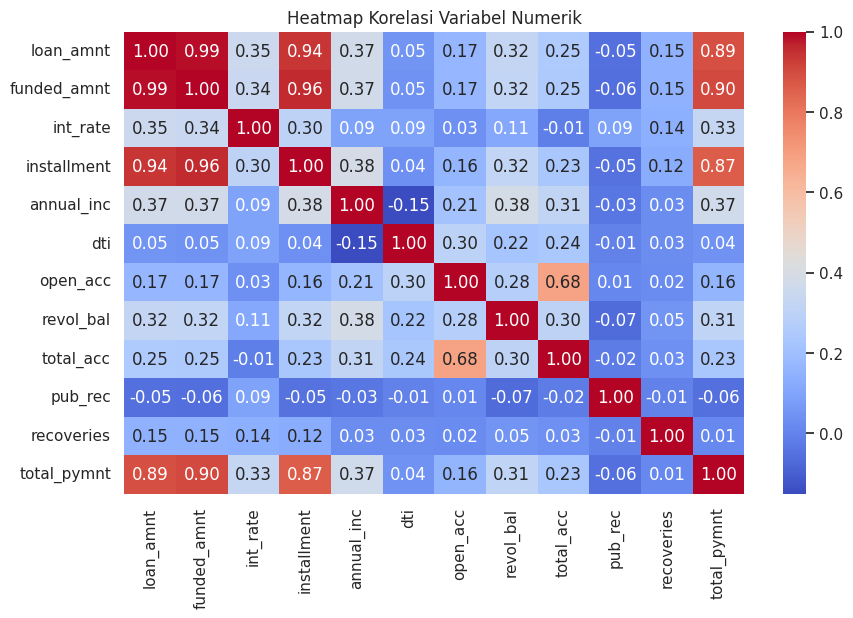

In [13]:
# ---  BIVARIATE ANALYSIS ---
##  Korelasi antar variabel numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()

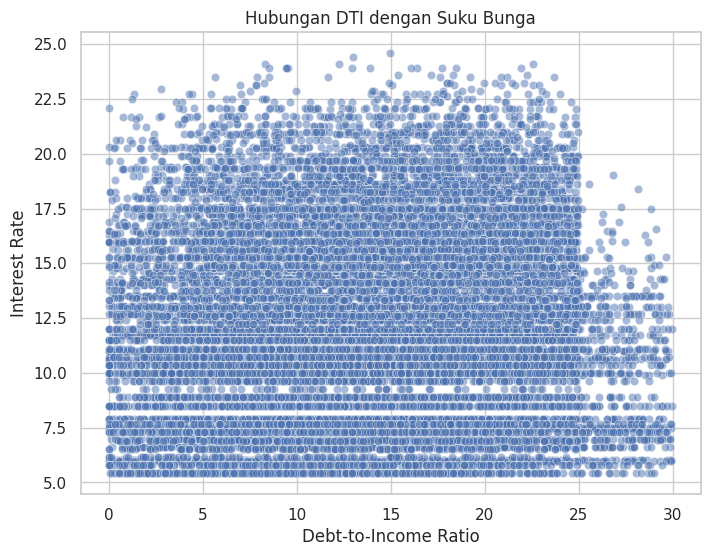

In [14]:
##  Scatterplot antara Suku Bunga dan DTI
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["dti"], y=df["int_rate"], alpha=0.5)
plt.xlabel("Debt-to-Income Ratio")
plt.ylabel("Interest Rate")
plt.title("Hubungan DTI dengan Suku Bunga")
plt.show()

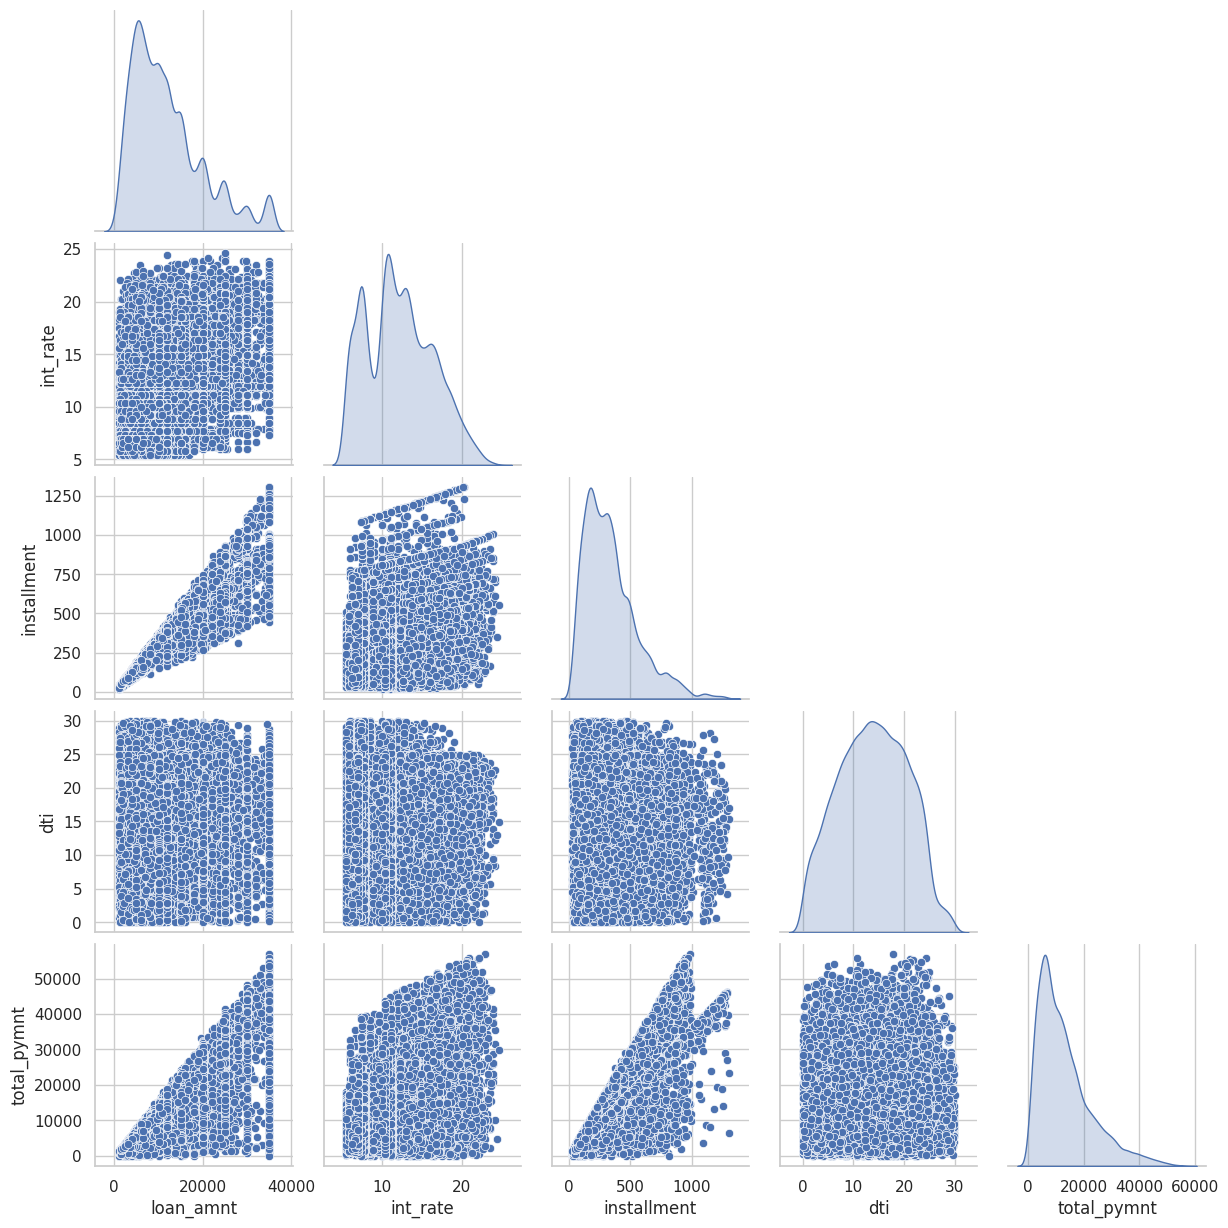

In [15]:

# --- MULTIVARIATE ANALYSIS ---
##  Pairplot untuk melihat pola hubungan antar variabel
selected_columns = ["loan_amnt", "int_rate", "installment", "dti", "total_pymnt"]
sns.pairplot(df[selected_columns], diag_kind="kde", corner=True)
plt.show()

In [16]:
#Data Cleaning and Handling Missing Values
# Mengecek jumlah missing values
print(df.isnull().sum())

# Menghapus kolom dengan terlalu banyak missing values
df.dropna(axis=1, thresh=len(df)*0.5, inplace=True)  # Hapus kolom dengan >50% missing


# Mengisi missing values numerik dengan median
df.fillna(df.median(numeric_only=True), inplace=True)

# Mengisi missing values kategorik dengan mode
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].fillna(df[col].mode()[0])


Unnamed: 0              0
id                      0
member_id               0
loan_amnt               0
funded_amnt             0
                    ...  
all_util            22617
total_rev_hi_lim    22617
inq_fi              22617
total_cu_tl         22617
inq_last_12m        22617
Length: 75, dtype: int64


In [17]:
#feature selection
selected_features = [
    "loan_amnt", "int_rate", "installment", "annual_inc", "dti",
    "open_acc", "total_acc", "revol_bal", "pub_rec", "recoveries", "term", "grade",
    "verification_status", "purpose", "loan_status"
]
df = df[selected_features]
df

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,total_acc,revol_bal,pub_rec,recoveries,term,grade,verification_status,purpose,loan_status
0,5000,10.65,162.87,24000.0,27.65,3.0,9.0,13648.0,0.0,0.00,36 months,B,Verified,credit_card,Fully Paid
1,2500,15.27,59.83,30000.0,1.00,3.0,4.0,1687.0,0.0,117.08,60 months,C,Source Verified,car,Charged Off
2,2400,15.96,84.33,12252.0,8.72,2.0,10.0,2956.0,0.0,0.00,36 months,C,Not Verified,small_business,Fully Paid
3,10000,13.49,339.31,49200.0,20.00,10.0,37.0,5598.0,0.0,0.00,36 months,C,Source Verified,other,Fully Paid
4,3000,12.69,67.79,80000.0,17.94,15.0,38.0,27783.0,0.0,0.00,60 months,B,Source Verified,other,Current
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22612,12000,6.54,230.78,55000.0,15.16,13.0,34.0,13037.0,0.0,0.00,36 months,A,Source Verified,debt_consolidation,Fully Paid
22613,3000,6.17,91.50,26400.0,5.68,10.0,16.0,2895.0,0.0,0.00,36 months,A,Not Verified,credit_card,Fully Paid
22614,9400,6.91,206.61,31200.0,13.54,14.0,19.0,8992.0,0.0,0.00,36 months,A,Source Verified,debt_consolidation,Fully Paid
22615,6500,15.57,156.59,93024.0,24.48,14.0,38.0,17458.0,0.0,522.71,60 months,D,Not Verified,medical,Charged Off


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ["loan_amnt", "int_rate", "installment", "annual_inc", "dti"]
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [19]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ["term", "grade", "verification_status", "purpose"]
encoder = LabelEncoder()

for col in categorical_features:
    df[col] = encoder.fit_transform(df[col])


In [20]:
df["loan_to_income_ratio"] = df["loan_amnt"] / df["annual_inc"]
#feature creation
df

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,total_acc,revol_bal,pub_rec,recoveries,term,grade,verification_status,purpose,loan_status,loan_to_income_ratio
0,-0.862123,-0.365703,-0.803388,-0.958939,2.064467,3.0,9.0,13648.0,0.0,0.00,0,1,2,1,Fully Paid,0.899038
1,-1.170279,0.748789,-1.278935,-0.832445,-1.910214,3.0,4.0,1687.0,0.0,117.08,1,2,1,0,Charged Off,1.405833
2,-1.182605,0.915240,-1.165863,-1.206613,-0.758825,2.0,10.0,2956.0,0.0,0.00,0,2,0,10,Fully Paid,0.980103
3,-0.245810,0.319396,0.010914,-0.427666,0.923517,10.0,37.0,5598.0,0.0,0.00,0,2,1,8,Fully Paid,0.574771
4,-1.108648,0.126411,-1.242198,0.221667,0.616281,15.0,38.0,27783.0,0.0,0.00,1,1,1,8,Current,-5.001422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22612,0.000715,-1.357167,-0.489971,-0.305389,0.201661,13.0,34.0,13037.0,0.0,0.00,0,0,1,2,Fully Paid,-0.002341
22613,-1.108648,-1.446423,-1.132772,-0.908341,-1.212222,10.0,16.0,2895.0,0.0,0.00,0,0,0,1,Fully Paid,1.220519
22614,-0.319768,-1.267911,-0.601520,-0.807147,-0.039952,14.0,19.0,8992.0,0.0,0.00,0,0,1,2,Fully Paid,0.396170
22615,-0.677229,0.821159,-0.832371,0.496242,1.591681,14.0,38.0,17458.0,0.0,522.71,1,3,0,6,Charged Off,-1.364716


In [21]:
#pisah data training dan testing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

X = df.drop(columns=["loan_status"])  # Fitur
y = df["loan_status"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)



LogisticRegression(max_iter=1000)

In [23]:
#Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
#Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
log_pred = log_model.predict(X_test)
log_acc = accuracy_score(y_test, log_pred)

tree_pred = tree_model.predict(X_test)
tree_acc = accuracy_score(y_test, tree_pred)

rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [26]:
# Buat DataFrame untuk membandingkan akurasi ketiga model
model_comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [log_acc, tree_acc, rf_acc]
})

# Tampilkan hasil
print(model_comparison)


                 Model  Accuracy
0  Logistic Regression  0.102122
1        Decision Tree  0.818744
2        Random Forest  0.869584


In [50]:
# Ambil Feature Importance dari Random Forest
feature_importance = rf_model.feature_importances_

# Buat DataFrame untuk mempermudah visualisasi
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Tampilkan 10 fitur terpenting
print(importance_df.head(10))


                 Feature  Importance
9             recoveries    0.383069
10                  term    0.079739
1               int_rate    0.061055
4                    dti    0.058090
7              revol_bal    0.056899
2            installment    0.056025
14  loan_to_income_ratio    0.055063
3             annual_inc    0.053874
6              total_acc    0.046276
0              loan_amnt    0.045448


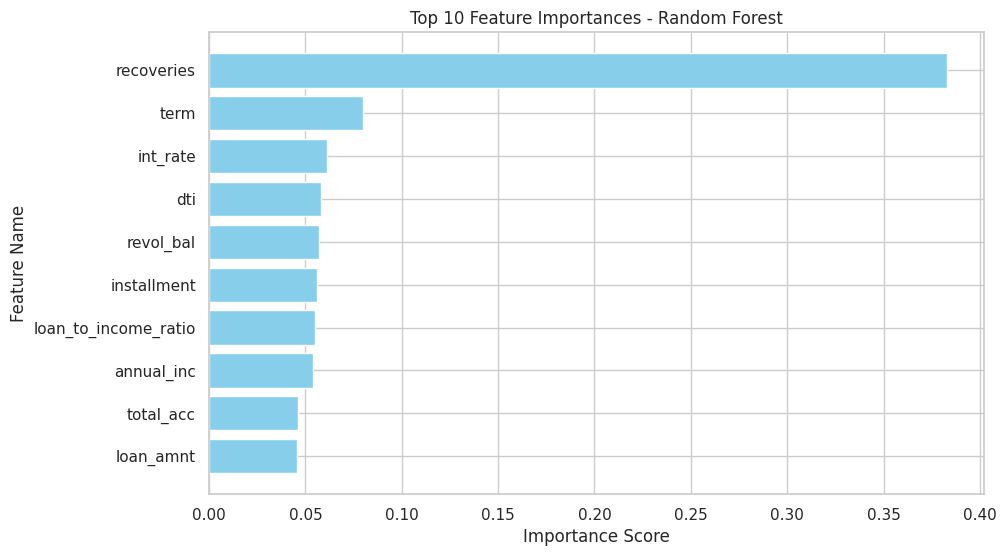

In [51]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"][:10], importance_df["Importance"][:10], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.title("Top 10 Feature Importances - Random Forest")
plt.gca().invert_yaxis()  # Membalik urutan agar fitur terpenting di atas
plt.show()
